# General Approaches

## Util-Class

In [1]:
# @title
class CLASSINIT:
  pass
class PROCESS:
  pass
class POINT:
  pass
class DOCUMENTATION:
  pass
class MODEL:
  pass
class ERROR:
  pass
class LOCATION:
  pass
class FORMULA:
  pass
class DATA:
  pass
class NULL:
  pass

## Util-Modules

In [2]:
# @title
%%capture
!pip install skyfield
!pip install astropy
!pip install "pyautogen~=0.2.0b2" Langchain

In [3]:
# @title
from skyfield.api import load,Topos,Star
from skyfield.data import hipparcos
from astropy.coordinates import SkyCoord,EarthLocation
import astropy.units as unit

In [5]:
# @title
import os,shutil,math,random,numpy as np,matplotlib.pyplot as plt,matplotlib.cm as cm
from matplotlib.patches import Circle
from datetime import datetime,timedelta

In [6]:
# @title
%matplotlib inline
plt.style.use("dark_background")

# Util-Error

In [7]:
# @title
class ErrorModule(object):
  def __init__(self)->CLASSINIT:
    self.error = NotImplementedError(NotImplemented)
  def __str__(self)->str:
    return "Error Module - Sub(Script)"
  def __call__(self)->ERROR:
    return self.error
  def __getstate__(self)->ERROR:
    raise self.error
  def __repr__(self)->DOCUMENTATION|str:
    return ErrorModule.__doc__
  @property
  def Default(self)->ERROR:
    raise self.error
  def Manuel(self,errorType:ERROR,errorMessage:str)->ERROR:
    raise errorType(errorMessage)

## Util-Functions

In [8]:
# @title
CreateDirectory = lambda x: os.mkdir(x) if not os.path.exists(x) else None
DeleteDirectory = lambda x: shutil.rmtree(x) if len(os.listdir(x)) > 1 else None

In [10]:
# @title
def ConvertJulian(day:int,month:int,year:int,utc:int or float)->int or float:
  if (month <= 2):
    yearBase = year-1
    monthBase = month+12
  else:
    yearBase = year
    monthBase = month
  if (year < 1582):
    base = -2
  elif (year == 1582):
    if (month < 10):
      base = -2
    elif (month == 10):
      if (day <= 4):
        base = -2
      else:
        base = math.floor(yearBase/400)-math.floor(yearBase/100)
    else:
      base = math.floor(yearBase/400)-math.floor(yearBase/100)
  else:
    base = math.floor(yearBase/400)-math.floor(yearBase/100)
  return math.floor(365.25*yearBase)+math.floor(30.6001*(monthBase+1))+base+1720996.5+day+utc/24

In [11]:
# @title
# Download links: https://rhodesmill.org/skyfield/planets.html#ephemeris-download-links
# Download link: https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/
# Download link: https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/satellites/
# 1997: de405.bsp (1600 to 2200, 63MB), de406.bsp (−3000 to 3000, 287MB)
# 2008: de421.bsp (1900 to 2050, 17MB), de422.bsp (−3000 to 3000, 623MB)
# 2013: de430_1850-2150.bsp (1850 to 2150, 31MB), de430t.bsp (1550 to 2650, 128MB), de431t.bsp (–13200 to 17191, 3.5GB)
# 2020: de440s.bsp (1849 to 2150, 32MB), de440.bsp (1550 to 2650, 114MB), de441.bsp (−13200 to 17191, 3.1GB)
def LoadSkyData(dataType:str="de421.bsp")->DATA:
  database = load(str(dataType))
  return database

In [12]:
# @title
def ReturnCurrentTime()->str:
  return datetime.now()

In [13]:
# @title
def DistanceCalculation3D(coordOne:tuple or list,coordTwo:tuple or list)->int or float:
  x1,y1,z1 = coordOne
  x2,y2,z2 = coordTwo
  distance = math.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
  return distance

In [14]:
# @title
def GetPlanetCoordinates(database:CLASSINIT,observerBase:CLASSINIT,planetName:str,time:CLASSINIT)->list or tuple:
  planetData = database[planetName]
  astrometricValues = observerBase.at(time).observe(planetData)
  return astrometricValues.position.au

In [15]:
# @title
# HIP Catalog for Stars: https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=1239/hip_main
# Hipparcos: https://www.cosmos.esa.int/web/hipparcos/catalogues
def LoadHipparcosData()->DATA:
  with load.open(hipparcos.URL) as hfile:
    stars = hipparcos.load_dataframe(hfile)
  stars = stars[stars["magnitude"] <= 5]
  stars = stars.reset_index()
  return stars

In [16]:
# @title
def DefineCurrentTimeJulian()->int or float:
  timeScale = load.timescale()
  now = datetime.now()
  julian = timeScale.utc(
      now.year,
      now.month,
      now.day,
      now.hour,
      now.minute
  )
  return julian,now

In [17]:
# @title
def DefineObserver(latitude:str,longitude:str)->POINT:
  observerLocation = Topos(latitude,longitude)
  earthFrame = database["earth"]
  observer = earthFrame+observerLocation
  return observer,observerLocation

# Operations

## Data Load

In [ ]:
# @title
database = LoadSkyData("de440.bsp")

In [19]:
# @title
skyObjects = [
    "MERCURY BARYCENTER",
    "VENUS BARYCENTER",
    "MARS BARYCENTER",
    "JUPITER BARYCENTER",
    "SATURN BARYCENTER",
    "URANUS BARYCENTER",
    "NEPTUNE BARYCENTER",
    "PLUTO BARYCENTER",
    "SUN",
    "MOON"
]

In [ ]:
# @title
hipparcosCatalog = LoadHipparcosData()

In [21]:
# @title
# Common Star Names: https://www.cosmos.esa.int/web/hipparcos/common-star-names
starsCode = {
    13847: 'Acamar',
    7588: 'Achernar',
    60718: 'Acrux',
    33579: 'Adhara',
    68702: 'Agena',
    95947: 'Albireo',
    65477: 'Alcor',
    17702: 'Alcyone',
    21421: 'Aldebaran',
    105199: 'Alderamin',
    1067: 'Algenib',
    50583: 'Algieba',
    14576: 'Algol',
    31681: 'Alhena',
    62956: 'Alioth',
    67301: 'Alkaid',
    9640: 'Almaak',
    109268: 'Alnair',
    25428: 'Alnath',
    26727: 'Alnitak',
    46390: 'Alphard',
    76267: 'Alphekka',
    677: 'Alpheratz',
    98036: 'Alshain',
    97649: 'Altair',
    2081: 'Ankaa',
    80763: 'Antares',
    69673: 'Arcturus',
    25985: 'Arneb',
    112247: 'Babcock\'s star',
    87937: 'Barnard\'s star',
    25336: 'Bellatrix',
    27989: 'Betelgeuse',
    96295: 'Campbell\'s star',
    30438: 'Canopus',
    24608: 'Capella',
    746: 'Caph',
    36850: 'Castor',
    63125: 'Cor Caroli',
    98298: 'Cyg X-1',
    102098: 'Deneb',
    57632: 'Denebola',
    3419: 'Diphda',
    54061: 'Dubhe',
    107315: 'Enif',
    87833: 'Etamin',
    113368: 'Fomalhaut',
    57939: 'Groombridge 1830',
    68702: 'Hadar',
    9884: 'Hamal',
    72105: 'Izar',
    24186: 'Kapteyn\'s star',
    90185: 'Kaus Australis',
    72607: 'Kocab',
    110893: 'Kruger 60',
    36208: 'Luyten\'s star',
    113963: 'Markab',
    59774: 'Megrez',
    14135: 'Menkar',
    53910: 'Merak',
    25930: 'Mintaka',
    10826: 'Mira',
    5447: 'Mirach',
    15863: 'Mirphak',
    65378: 'Mizar',
    25606: 'Nihal',
    92855: 'Nunki',
    58001: 'Phad',
    17851: 'Pleione',
    11767: 'Polaris',
    37826: 'Pollux',
    37279: 'Procyon',
    70890: 'Proxima',
    84345: 'Rasalgethi',
    86032: 'Rasalhague',
    30089: 'Red Rectangle',
    49669: 'Regulus',
    24436: 'Rigel',
    71683: 'Rigil Kent',
    109074: 'Sadalmelik',
    27366: 'Saiph',
    113881: 'Scheat',
    30438: 'Canopus',
    85927: 'Shaula',
    3179: 'Shedir',
    92420: 'Sheliak',
    32349: 'Sirius',
    65474: 'Spica',
    97278: 'Tarazed',
    68756: 'Thuban',
    77070: 'Unukalhai',
    3829: 'Van Maanen 2',
    91262: 'Vega',
    63608: 'Vindemiatrix',
    18543: 'Zaurak',
    60936: '3C 273'
}

# Plot Sky

In [22]:
# @title
colorList = cm.rainbow(np.linspace(0,1,20)) # if needed

In [23]:
# @title
def PlotNightSky(observer:CLASSINIT,observerLocation:CLASSINIT)->None:
  timeJulian,timeUTC = DefineCurrentTimeJulian()
  figure = plt.figure(figsize=(10,10))
  ax = plt.subplot(111,polar=True)
  for name in skyObjects:
    planetData = database[name]
    astrometricValues = observer.at(timeJulian).observe(planetData)
    alt,az,distance = astrometricValues.apparent().altaz()
    if alt.degrees > 0:
      ax.annotate(
          name.capitalize(),
          xy=(np.radians(az.degrees),90-alt.degrees),
          xytext=(5,5),
          fontsize="small",
          textcoords="offset points"
      )
      if "jupiter" in name.lower():
        colorCode = "#FFDB58"
        size = 60
      elif "mars" in name.lower():
        colorCode = "#FF4500"
        size = 20
      elif "saturn" in name.lower():
        colorCode = "#FFD700"
        size = 55
      elif "mercury" in name.lower():
        colorCode = "#8B0000"
        size = 15
      elif "moon" in name.lower():
        colorCode = "white"
        size = 10
      elif "pluto" in name.lower():
        colorCode = "#D3D3D3"
        size = 8
      elif "uranus" in name.lower():
        colorCode = "#B0C4DE"
        size = 40
      elif "NEPTUNE" in name.lower():
        colorCode = "#00008B"
        size = 35
      elif "sun" in name.lower():
        colorCode = "#FFFFE0"
        size = 70
      elif "venus" in name.lower():
        colorCode = "#FF0000"
        size = 23
      else:
        pass
      ax.scatter(
          np.radians(az.degrees),
          90-alt.degrees,
          color=colorCode,
          s=size,
          label=name.lower()
      )
  for starID in hipparcosCatalog.index:
    hipCode = hipparcosCatalog["hip"][starID]
    magnitudeValue = hipparcosCatalog["magnitude"][starID]
    try:
      starName = starsCode[hipCode]
    except:
      starName = "Non-Common Star"
    star = Star.from_dataframe(hipparcosCatalog.loc[starID])
    astrometricValues = observer.at(timeJulian).observe(star)
    alt,az,distance = astrometricValues.apparent().altaz()
    if alt.degrees > 0:
      if starName != "Non-Common Star":
        if magnitudeValue < 1.0:
          colorCode = "#7FFFD4"
          size = 20
          ax.annotate(
          starName.capitalize(),
          xy=(np.radians(az.degrees),90-alt.degrees),
          xytext=(5,5),
          fontsize="small",
          textcoords="offset points"
      )
          ax.scatter(
            np.radians(az.degrees),
            90-alt.degrees,
            color=colorCode,
            s=size,
            label=starName.lower()
        )
        else:
          colorCode = "#008B8B"
          size = 14
          ax.scatter(
            np.radians(az.degrees),
            90-alt.degrees,
            color=colorCode,
            s=size
        )
      else:
        if magnitudeValue < 2:
          colorCode = "#7FFFD4"
          size = 20
        else:
          colorCode = "#008B8B"
          size = 14
        ax.scatter(
            np.radians(az.degrees),
            90-alt.degrees,
            color=colorCode,
            s=size
        )
  ax.scatter(0,0,color='red',marker='o',s=22,label='Observer')
  ax.set_title(f"From {observerLocation} / Time: {timeUTC}")
  ax.set_theta_zero_location("N")
  ax.set_theta_direction(-1)
  ax.set_ylim(0,90)
  ax.set_yticks(range(0,91,30))
  ax.set_yticklabels(['90°','60°','30°','Horizon'])
  ax.legend(loc="upper left",fontsize="small",markerscale=0.3)
  plt.tight_layout()
  plt.show()

In [33]:
latitude = "38.9637" # @param {type:"string"}
directionLatitude = "N" # @param ["N", "S", "E", "W"]
longitude = "35.2433 " # @param {type:"string"}
directionLongitude = "E" # @param ["N", "S", "E", "W"]

latitudePosition = latitude + " " + directionLatitude
longitudePosition = longitude + " " + directionLongitude

In [31]:
observer,observerLocation = DefineObserver(latitude=latitudePosition,longitude=longitudePosition)

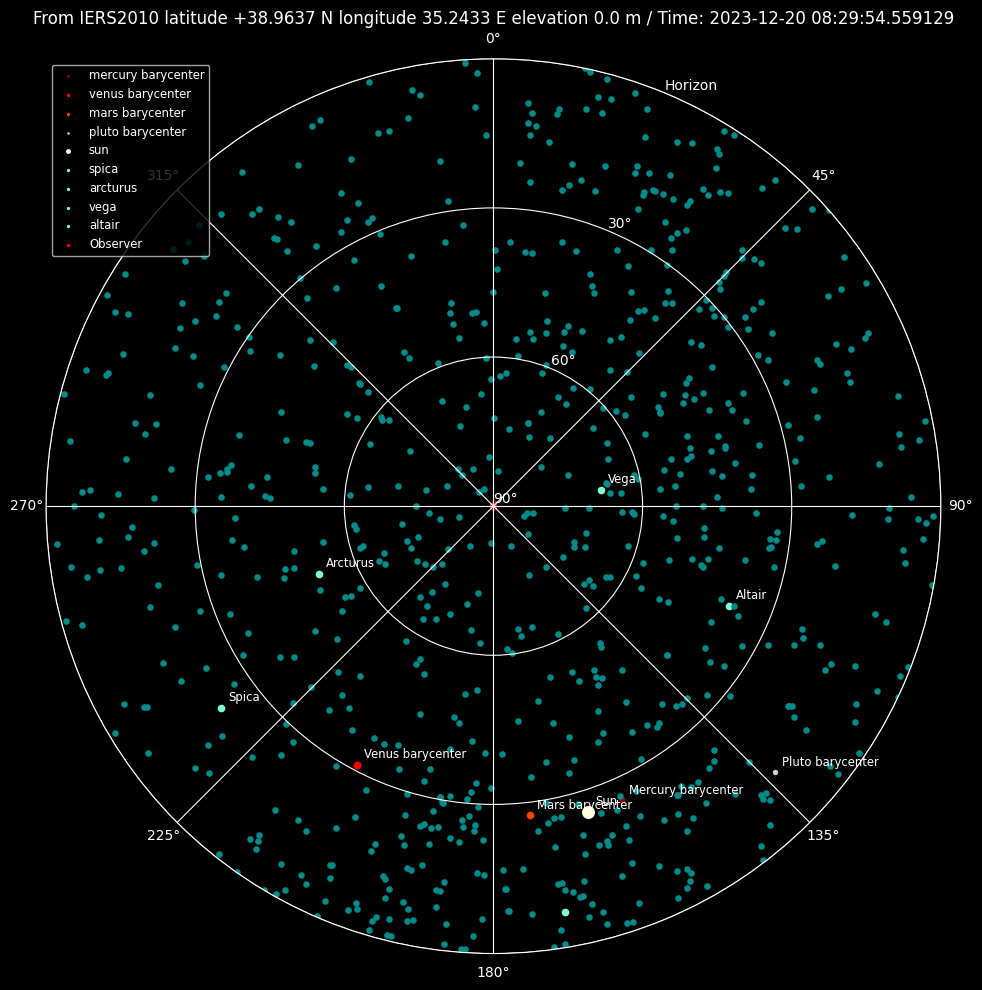

In [32]:
PlotNightSky(observer,observerLocation)